# Compare the ssh output from different runs

In [155]:
import pandas as pd
import matplotlib.pyplot as plt

#### Comparison for data averaged over tide gauge locations

In [156]:
path = '/projects/0/einf2878/ROMS/data'

In [157]:
# Import processed ROMS output data averaged over tide gauges

ecco_tg = pd.read_csv(f'{path}/ECCO/roms_output/run1/complete_run/processed_data/ssh_tidegauges.csv', index_col = 'time')
soda_tg = pd.read_csv(f'{path}/SODA/roms_output/old_run/complete_run/processed_data/ssh_tidegauges.csv', index_col = 'time')
glorys_tg = pd.read_csv(f'{path}/GLORYS/roms_output/old_run/complete_run/processed_data/ssh_tidegauges.csv', index_col = 'time')
ora3_tg = pd.read_csv(f'{path}/ORA/roms_output/old_run/complete_run/run3/processed_data/ssh_tidegauges.csv', index_col = 'time')
ora5_tg = pd.read_csv(f'{path}/ORA/roms_output/old_run/complete_run/run5/processed_data/ssh_tidegauges.csv', index_col = 'time')


# Convert from m to cm
ecco_tg = ecco_tg*100
soda_tg = soda_tg*100
glorys_tg = glorys_tg*100
ora3_tg = ora3_tg*100
ora5_tg = ora5_tg*100

In [158]:
# Import budget data from Dewi
budget_tg = pd.read_csv(f'{path}/budget/budget_tide_gauges.csv', index_col = 'time')

<AxesSubplot:xlabel='time'>

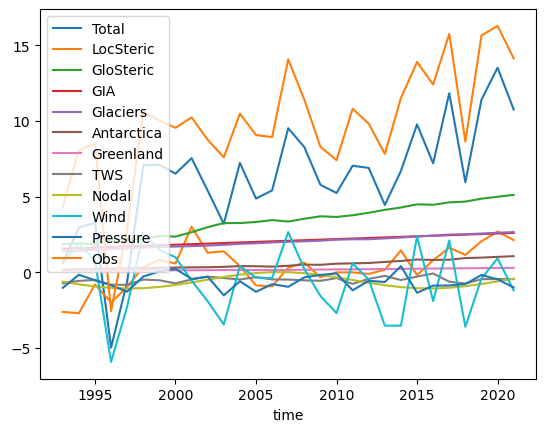

In [159]:
budget_tg.plot()

<AxesSubplot:xlabel='time'>

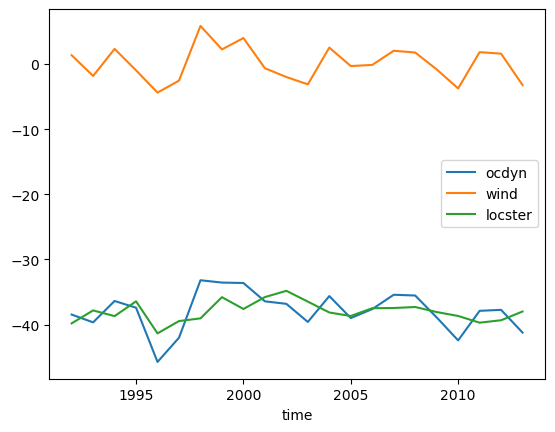

In [160]:
ecco_tg.plot()

<AxesSubplot:xlabel='time'>

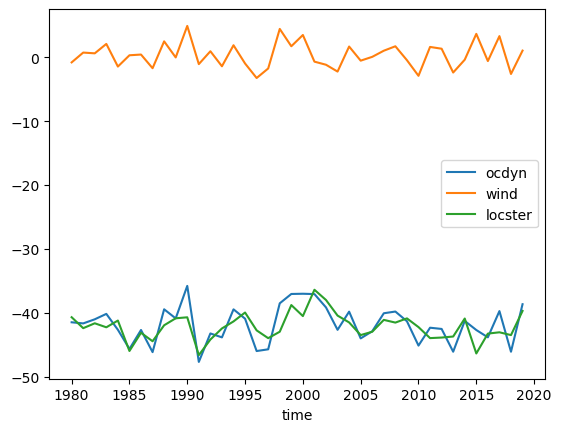

In [161]:
soda_tg.plot()

<AxesSubplot:xlabel='time'>

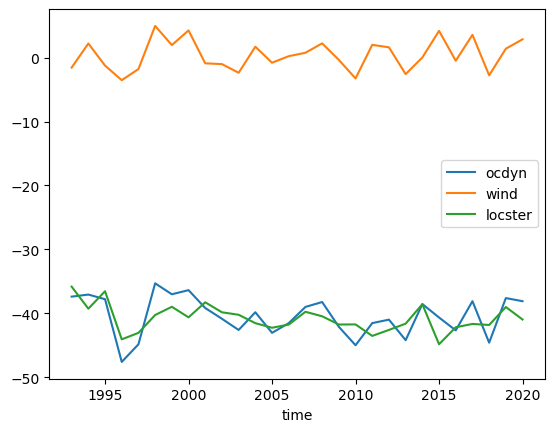

In [162]:
glorys_tg.plot()

<AxesSubplot:xlabel='time'>

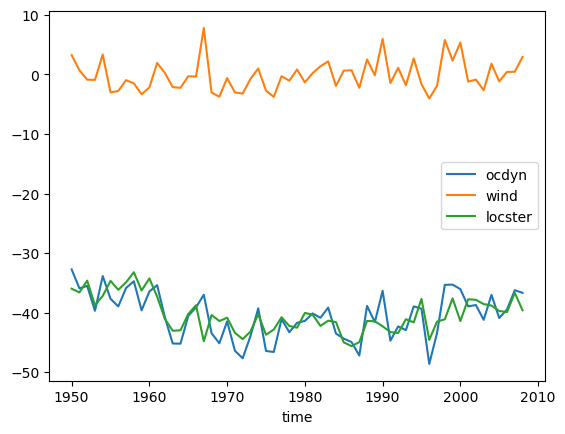

In [163]:
ora3_tg.plot()

<AxesSubplot:xlabel='time'>

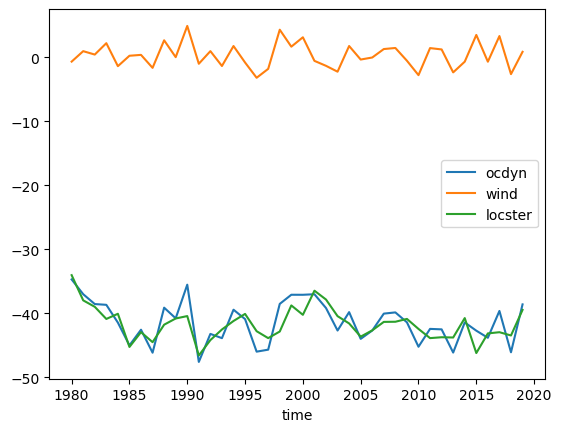

In [164]:
ora5_tg.plot()

### Obtain anomalies compared to 1993

In [165]:
anom_year = 1993

ecco_tg = ecco_tg - ecco_tg.loc[anom_year]
soda_tg = soda_tg - soda_tg.loc[anom_year]
glorys_tg = glorys_tg - glorys_tg.loc[anom_year]
ora3_tg = ora3_tg - ora3_tg.loc[anom_year]
ora5_tg = ora5_tg - ora5_tg.loc[anom_year]

<AxesSubplot:xlabel='time'>

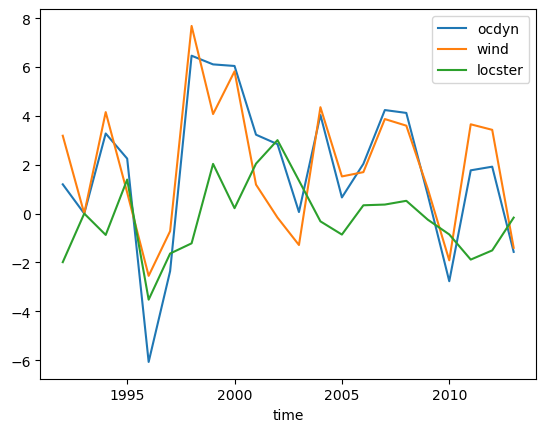

In [166]:
ecco_tg.plot()

<AxesSubplot:xlabel='time'>

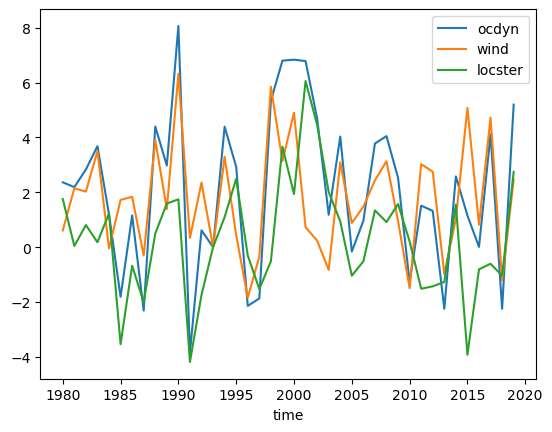

In [167]:
soda_tg.plot()

<AxesSubplot:xlabel='time'>

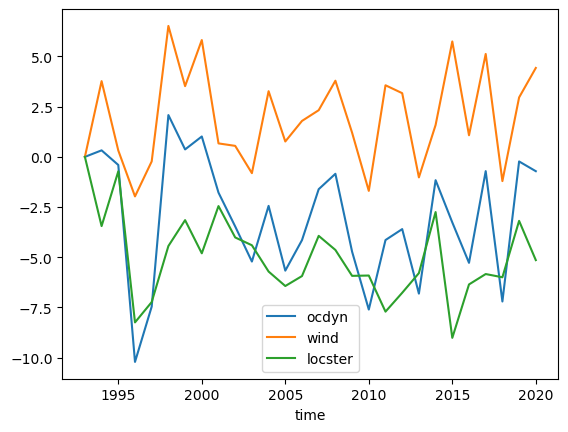

In [168]:
glorys_tg.plot()

<AxesSubplot:xlabel='time'>

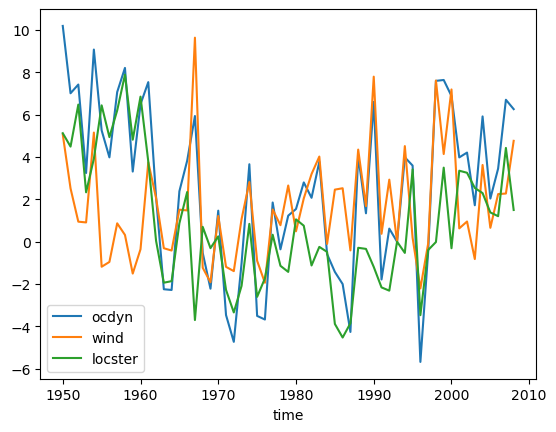

In [169]:
ora3_tg.plot()

<AxesSubplot:xlabel='time'>

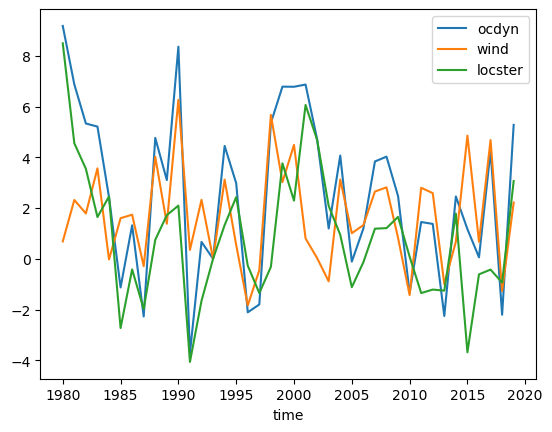

In [170]:
ora5_tg.plot()

## Create plot of ocean-dynamic sea level



In [171]:
budget_tg_wind = budget_tg['Wind']
budget_tg_locster = budget_tg['LocSteric']
budget_tg_ocdyn = budget_wind + budget_locster

# Obtain anomalies
budget_tg_wind = budget_tg_wind - budget_tg_wind.loc[anom_year]
budget_tg_locster = budget_tg_locster - budget_tg_locster.loc[anom_year]
budget_tg_ocdyn = budget_tg_ocdyn - budget_tg_ocdyn.loc[anom_year]

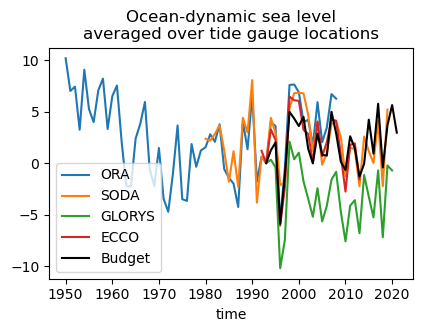

In [191]:
plt.figure(figsize = (4.7,3))

ora3_tg['ocdyn'].plot(label = 'ORA')
soda_tg['ocdyn'].plot(label = 'SODA')
glorys_tg['ocdyn'].plot(label = 'GLORYS')
ecco_tg['ocdyn'].plot(label = 'ECCO')
budget_tg_ocdyn.plot(color = 'k', label = 'Budget')

plt.title('Ocean-dynamic sea level\naveraged over tide gauge locations')

plt.legend()

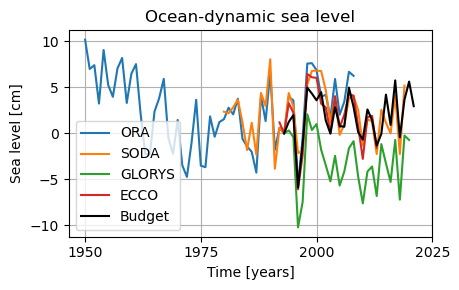

In [199]:
plt.figure(figsize = (4.7,3))

ora3_tg['ocdyn'].plot(label = 'ORA')
soda_tg['ocdyn'].plot(label = 'SODA')
glorys_tg['ocdyn'].plot(label = 'GLORYS')
ecco_tg['ocdyn'].plot(label = 'ECCO')
budget_tg_ocdyn.plot(color = 'k', label = 'Budget')

plt.title('Ocean-dynamic sea level')
plt.ylabel('Sea level [cm]')
plt.xlabel('Time [years]')
plt.xticks(range(1950, 2026, 25))

plt.legend()
plt.grid()
plt.tight_layout()


plt.savefig('/projects/0/einf2878/ROMS/figures/ssh_comparison_tide_gauges/ocdyn.png', dpi = 150)

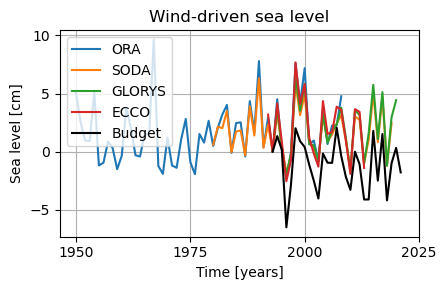

In [200]:
plt.figure(figsize = (4.7,3))

ora3_tg['wind'].plot(label = 'ORA')
soda_tg['wind'].plot(label = 'SODA')
glorys_tg['wind'].plot(label = 'GLORYS')
ecco_tg['wind'].plot(label = 'ECCO')
budget_tg_wind.plot(color = 'k', label = 'Budget')

plt.title('Wind-driven sea level')
plt.ylabel('Sea level [cm]')
plt.xlabel('Time [years]')
plt.xticks(range(1950, 2026, 25))

plt.legend()
plt.grid()
plt.tight_layout()


plt.savefig('/projects/0/einf2878/ROMS/figures/ssh_comparison_tide_gauges/wind.png', dpi = 150)

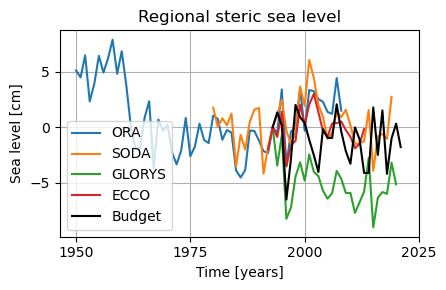

In [201]:
plt.figure(figsize = (4.7,3))

ora3_tg['locster'].plot(label = 'ORA')
soda_tg['locster'].plot(label = 'SODA')
glorys_tg['locster'].plot(label = 'GLORYS')
ecco_tg['locster'].plot(label = 'ECCO')
budget_tg_wind.plot(color = 'k', label = 'Budget')

plt.title('Regional steric sea level')
plt.ylabel('Sea level [cm]')
plt.xlabel('Time [years]')
plt.xticks(range(1950, 2026, 25))

plt.legend()
plt.grid()
plt.tight_layout()

plt.savefig('/projects/0/einf2878/ROMS/figures/ssh_comparison_tide_gauges/locster.png', dpi = 150)